In [11]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Sample use case: Classifying Iris flower species using K Nearest Neighbors (KNN)

# Load the Iris dataset
wine = load_wine()
X = wine.data  # Features: sepal length, sepal width, petal length, petal width
y = wine.target  # Labels: 0 = setosa, 1 = versicolor, 2 = virginica
print(X)
print(y)

[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [13]:
# Split the data into training and testing sets
# test_size=0.2 means 20% of the data will be used for testing and 80% for training
# random_state=42 ensures reproducibility of the train/test split by setting a fixed seed for the random number generator
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

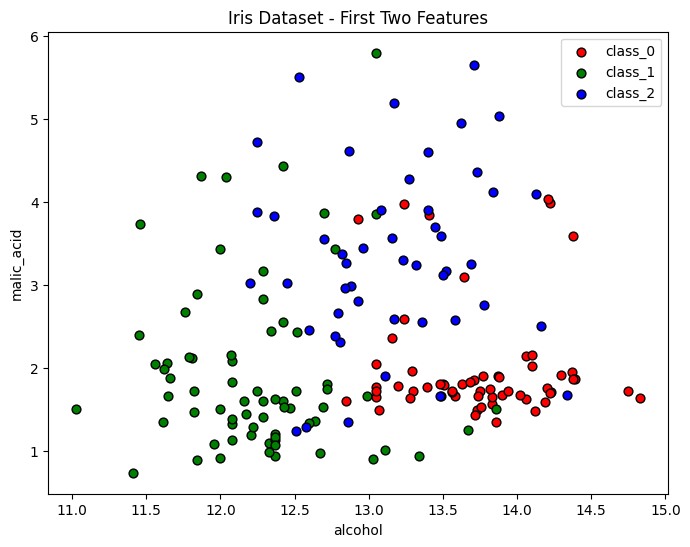

In [ ]:
# Use the first two features for visualization
plt.figure(figsize=(8, 6))
for target, color, label in zip([0, 1, 2], ['red', 'green', 'blue'], wine.target_names):
    plt.scatter(X[y == target, 0], X[y == target, 1], c=color, label=label, edgecolor='k', s=40)
plt.xlabel(wine.feature_names[0])
plt.ylabel(wine.feature_names[1])
plt.title("Iris Dataset - First Two Features")
plt.legend()
plt.show()

In [15]:
# Predict the species for the test set
y_pred = model.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("KNN Classifier for Iris Dataset")
sample_idx = 11
print("Sample features:", X_test[sample_idx])
print("True label:", y_test[sample_idx])
print("Predicted label:", y_pred[sample_idx])
#print("Test data sample:", X_test)
#print("Test data predictions:", y_pred)
print(f"Test set accuracy: {accuracy:.2f}")

KNN Classifier for Iris Dataset
Sample features: [1.35e+01 3.12e+00 2.62e+00 2.40e+01 1.23e+02 1.40e+00 1.57e+00 2.20e-01
 1.25e+00 8.60e+00 5.90e-01 1.30e+00 5.00e+02]
True label: 2
Predicted label: 0
Test set accuracy: 0.94


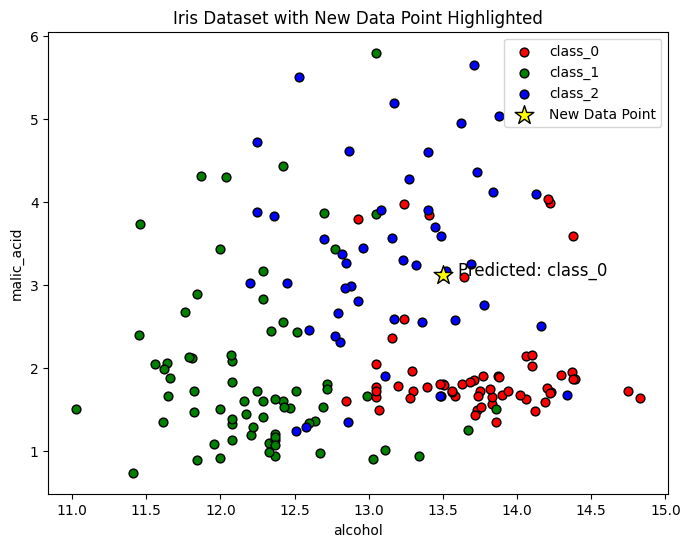

In [ ]:
# Visualize the new data point (from X_test[sample_idx]) in the context of the entire dataset
plt.figure(figsize=(8, 6))
for target, color, label in zip([0, 1, 2], ['red', 'green', 'blue'], wine.target_names):
    plt.scatter(X[y == target, 0], X[y == target, 1], c=color, label=label, edgecolor='k', s=40)

# Plot the new data point
plt.scatter(X_test[sample_idx, 0], X_test[sample_idx, 1], 
            c='yellow', edgecolor='black', s=200, marker='*', label='New Data Point')

# Annotate with predicted class
predicted_label = y_pred[sample_idx]
plt.text(X_test[sample_idx, 0]+0.1, X_test[sample_idx, 1], 
         f'Predicted: {wine.target_names[predicted_label]}', fontsize=12, color='black')

plt.xlabel(wine.feature_names[0])
plt.ylabel(wine.feature_names[1])
plt.title("Iris Dataset with New Data Point Highlighted")
plt.legend()
plt.show()